In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Display the top 10 == pandas.head(10)
X[0:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [2]:
# Remove mean / Set mean to zero.
X_normalized  = (X - X.mean(axis=0)) 

# Optionally, feature scalling.
X_normalized = X_normalized / X.std(axis=0)
X_normalized[0:10, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

# Plot the relationship between each two variables 

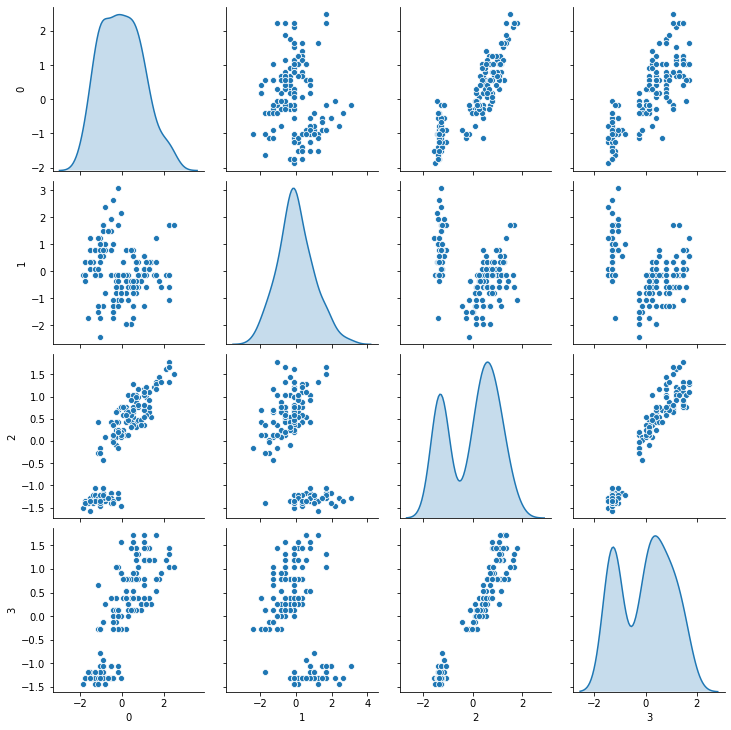

In [3]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = pd.DataFrame(X_normalized)
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'


# Calculate PCA with k=3 then plot the results in 3D shape.

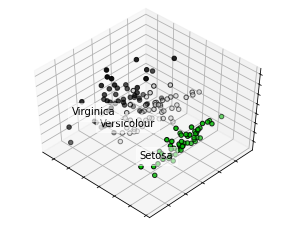

In [4]:
# Plot settings and configurations.
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

# PCA.
pca = decomposition.PCA(n_components=3)
z = pca.fit(X_normalized)
X_pca = pca.transform(X_normalized)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_pca[y == label, 0].mean(),
              X_pca[y == label, 1].mean() + 1.5,
              X_pca[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# Variance % Retained

In [5]:
pca = decomposition.PCA(n_components=4)
pca_X = pca.fit(X_normalized)
variance_retained_ratio = pca_X.explained_variance_ratio_.cumsum()
variance_retained_ratio

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [6]:
print (f'Variance retained by setting k=1 {variance_retained_ratio[0]}')
print (f'Variance retained by setting k=2 {variance_retained_ratio[1]}')
print (f'Variance retained by setting k=3 {variance_retained_ratio[2]}')
print (f'Variance retained by setting k=4 {variance_retained_ratio[3]}')

Variance retained by setting k=1 0.7296244541329987
Variance retained by setting k=2 0.9581320720000165
Variance retained by setting k=3 0.9948212908928452
Variance retained by setting k=4 1.0


# Estimated covariance of data.


In [7]:
covariance_matrix_Sigma = pca.get_covariance() # Sigma
print (covariance_matrix_Sigma.shape)
covariance_matrix_Sigma

(4, 4)


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

# Reconstruction from compressed representation


In [12]:
pca = decomposition.PCA(n_components=3)
pca_X = pca.fit(X_normalized)
X_pca = pca_X.transform(X)
print (f'The data After PCA reduction {X_pca.shape}')

# Reconstruction from compressed representation
reconstructed_X = pca.inverse_transform(X_pca)
print (f'The Reconstructed data from PCA reduction {reconstructed_X.shape}')


The data After PCA reduction (150, 3)
The Reconstructed data from PCA reduction (150, 4)


# ***********

# Complete Experiement
## Reduce the dimentionality from 4 to 3
## Then Apply SVM on the data

In [9]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
iris = datasets.load_iris()

# Convert IRIS to pandas Data frame 
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Split the data to train/cv/test
train_dataset, temp_test_dataset =  train_test_split(iris_df, test_size=0.4)
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)

print(f'train : {train_dataset.shape }' )
print(f'Valid : {valid_dataset.shape}' )
print(f'Test  : {test_dataset.shape}' )

# Pop the labels.
train_labels = train_dataset.pop('target')
test_labels = test_dataset.pop('target')
valid_labels = valid_dataset.pop('target')

#Normalize the data
def norm(x):
    return (x - train_dataset.mean() / train_dataset.std() )
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)


# Apply PCA
pca = decomposition.PCA(n_components=3)

# Fit the paramters on the training Dataset
pca.fit(normed_train_data)

# Apply PCA with train parameters on all splits
normed_train_data_pca = pca.transform(normed_train_data)
normed_test_data_pca = pca.transform(normed_test_data)
normed_valid_dataset_pca = pca.transform(normed_valid_dataset)


print(f'PCA - Train : {normed_train_data_pca.shape }' )
print(f'PCA - Valid : {normed_test_data_pca.shape}' )
print(f'PCA - Test  : {normed_valid_dataset_pca.shape}' )


#Create a svm Classifier
model = svm.SVC(C = 1, # reg paramater
                kernel='sigmoid', #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
               ) 

#Train the model using the training sets
model.fit(normed_train_data_pca, train_labels)

#Predict the response for test dataset
y_pred = model.predict(normed_test_data_pca)
print("Accuracy on Test after PCA : ",metrics.accuracy_score(test_labels, y_pred))

#Predict the response for test dataset
y_pred = model.predict(normed_valid_dataset_pca)
print("Accuracy on Cross Validation dataset after PCA : ",metrics.accuracy_score(valid_labels, y_pred))



train : (90, 5)
Valid : (30, 5)
Test  : (30, 5)
PCA - Train : (90, 3)
PCA - Valid : (30, 3)
PCA - Test  : (30, 3)
Accuracy on Test after PCA :  0.9
Accuracy on Cross Validation dataset after PCA :  0.9
